In [59]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [60]:
filename = "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/ImageData"
filenameTwo = "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/Genres"
fileNameThree =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/xTrain"
fileNameFour =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/xTest"
fileNameFive =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/yTrain"
fileNameSix =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/yTest"

In [61]:
filename = "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/ImageData"
filenameTwo = "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/Genres"
fileNameThree =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/xTrain"
fileNameFour =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/xTest"
fileNameFive =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/yTrain"
fileNameSix =  "/Users/anshverma/Documents/GitHub/MovieGenrePrediction/yTest"

def saveImages(imageList, genres, pathOne, pathTwo): 
    filehandler = open(pathOne, 'wb')
    np.save(filehandler, imageList)
    filehandlerTwo = open(pathTwo, 'wb')
    np.save(filehandlerTwo, genres)
    #pickle.dump(imageList, filehandler)
        
def loadImages(): 
    filehandler = open(filename, 'rb') 
    files = np.load(filehandler, allow_pickle=True) #pickle.load(filehandler)
    return files

def loadGenres(): 
    filehandlerTwo = open(filenameTwo, 'rb')
    genres = np.load(filehandlerTwo, allow_pickle=True)
    return genres

def load(filePath): 
    loader = csv

def tempSave(genres): 
    genres.to_csv(path_or_buf = filenameTwo)
    
def saveTesting(csv, path): 
    csv.to_csv(path_or_buf = path)
    
def fromCsv(path): 
    return pd.read_csv(path)

In [62]:
overviews=pd.DataFrame(movies["overview"])
movies_with_overviews=pd.concat([overviews, genre_labels], axis=1)
movies_with_overviews.head()
movies_with_overviews.dropna(subset = ["Action"], inplace=True)

NameError: name 'movies' is not defined

In [63]:
overviews=pd.read_csv("MoviesWithOverviews.csv")

In [64]:
overviews

,overview,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,"Led by Woody, Andy's toys live happily in his ...",0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,When siblings Judy and Peter discover an encha...,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,A family wedding reignites the ancient feud be...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,"Cheated on, mistreated and stepped on, the wom...",0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Just when George Banks has recovered from his ...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,The calving of an Arctic iceberg releases a gi...,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4996,A grieving doctor is being contacted by his la...,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4997,Lestat de Lioncourt is awakened from his slumb...,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4998,Vietnam veteran Leon Barlow is struggling as a...,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [65]:
print(overviews.shape)

(5000, 21)


In [66]:
#reference-https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

In [67]:
#filter = overviews["overview"] != ""
#overviews = overviews[filter]
#overviews = overviews.dropna()

In [68]:
# Text cleaning
#reference: https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text): 
    #removing everything except letters and converting to lower case
    text = re.sub("[^a-zA-Z]"," ",str(text))
    text = ' '.join(text.split())
    text = text.lower() 
    return text

# Removing stopwords such as the, and, to, or etc
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

In [69]:
plot_summaries=[]
for text in overviews['overview']:
    cleanText=clean_text(text)
    textWithoutStopwords=remove_stopwords(cleanText)
    plot_summaries+=[textWithoutStopwords]
overviews.insert(1, "clean_overview", plot_summaries, True)
print("Features: ", overviews.columns)

Features:  Index(['overview', 'clean_overview', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')


In [70]:
genreLabels=overviews[[ 'Action', 'Adventure', 'Animation', 
       'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music',
       'Mystery', 
       'Romance', 'Science Fiction', 'TV Movie',
        'Thriller',
        'War', 'Western']]
genreLabels.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

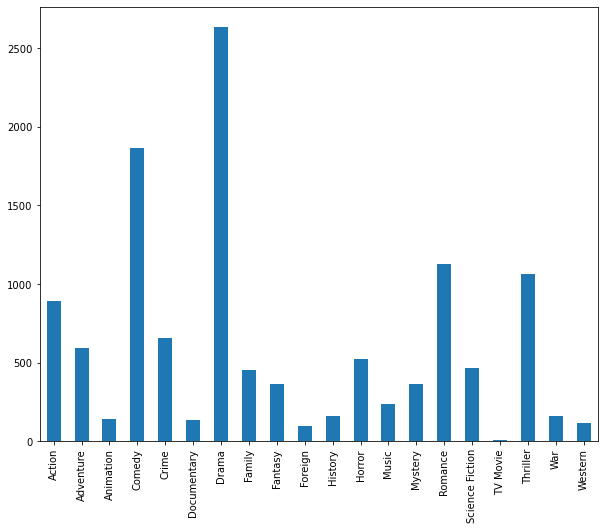

In [71]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
genreLabels.sum(axis=0).plot.bar()

In [72]:
X = []
sentences = list(overviews["clean_overview"])
for sen in sentences:
    X.append(sen)

y = genreLabels.values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [74]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
#number of unique words
vocab_length = len(tokenizer.word_index) + 1

In [75]:
#converting sentences to arrays
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [76]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/anshverma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
#Finding the number of words in the longest overveiw and applying padding
from nltk.tokenize import word_tokenize

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(overviews["clean_overview"], key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
print(length_long_sentence )

X_train = pad_sequences(X_train, length_long_sentence, padding='post')
X_test = pad_sequences(X_test, length_long_sentence, padding='post')

105


In [78]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/Users/anshverma/Downloads/glove.6B.100d.txt', encoding="utf8")

In [79]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [80]:
#creating embedding matrix
embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [81]:
deep_inputs = Input(shape=(length_long_sentence,))
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(20, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [82]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 105)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 105, 100)          1988400   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2580      
Total params: 2,108,228
Trainable params: 119,828
Non-trainable params: 1,988,400
_________________________________________________________________
None


In [83]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 3200 samples, validate on 800 samples
Epoch 1/5
3200/3200 [==============================] - 20s 6ms/step - loss: 0.4617 - acc: 0.8684 - val_loss: 0.3050 - val_acc: 0.8845
Epoch 2/5
3200/3200 [==============================] - 20s 6ms/step - loss: 0.3044 - acc: 0.8808 - val_loss: 0.3020 - val_acc: 0.8845
Epoch 3/5
3200/3200 [==============================] - 29s 9ms/step - loss: 0.3024 - acc: 0.8815 - val_loss: 0.3018 - val_acc: 0.8845
Epoch 4/5
3200/3200 [==============================] - 35s 11ms/step - loss: 0.3021 - acc: 0.8805 - val_loss: 0.3015 - val_acc: 0.8845
Epoch 5/5
3200/3200 [==============================] - 37s 12ms/step - loss: 0.3024 - acc: 0.8810 - val_loss: 0.3016 - val_acc: 0.8845


In [ ]:
model

In [85]:
model.save("savedNlpModel")